In [ ]:
import os
import pandas as pad #data manipulation
import numpy as nup # we have varius emotion recognition going on in our code.So we are segregrating the emotions in arrays
import glob #used for getting file directories
import soundfile #used for creating soundfile format
import os 
import sys 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




In [ ]:

import librosa #python package for audio analysis
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt #matplot is for plotting our waveplot and spectogram diagrams
from sklearn import metrics # used for creating a matrix format to the emotions we recognized

In [ ]:
from IPython.display import Audio

In [ ]:
import warnings 
if not sys.warnoptions: #option created for exception handling. If any error comes we ignore in by using this.
  warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
RavdessData = "/content/drive/MyDrive/Data/audio_speech_actors_01-24/" 

In [ ]:
import torch

In [ ]:
ravedessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []
for dir in ravedessDirectoryList:
  actor = os.listdir(RavdessData + dir)
  for file in actor:
    part = file.split('.')[0]
    part = part.split('-')
    fileEmotion.append(int(part[2]))
    filePath.append(RavdessData + dir + '/' +file)
emotion_df = pad.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pad.DataFrame(filePath,columns=['Path'])
Ravdess_df = pad.concat([emotion_df,path_df], axis=1)


In [ ]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/Data/audio_speech_actor...
1,neutral,/content/drive/MyDrive/Data/audio_speech_actor...
2,calm,/content/drive/MyDrive/Data/audio_speech_actor...
3,happy,/content/drive/MyDrive/Data/audio_speech_actor...
4,neutral,/content/drive/MyDrive/Data/audio_speech_actor...


In [ ]:
dataPath = pad.concat([Ravdess_df], axis = 0)
dataPath.to_csv("data_path.csv", index=False)
dataPath.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/Data/audio_speech_actor...
1,neutral,/content/drive/MyDrive/Data/audio_speech_actor...
2,calm,/content/drive/MyDrive/Data/audio_speech_actor...
3,happy,/content/drive/MyDrive/Data/audio_speech_actor...
4,neutral,/content/drive/MyDrive/Data/audio_speech_actor...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


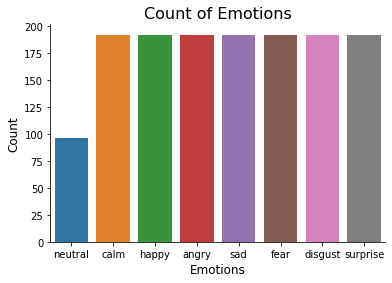

In [ ]:
mplt.title('Count of Emotions', size=16)
sbn.countplot(dataPath.Emotions)
mplt.ylabel('Count', size=12)
mplt.xlabel('Emotions', size=12)
sbn.despine(top=True, right=True, left=False, bottom=False)
mplt.show()

In [ ]:
def createWaveplot(data, sr, e):
  mplt.figure(figsize=(10,3))
  mplt.title('Waveplot for audio with {} emotion'.format(e), size=15)
  librosa.display.waveplot(data, sr=sr)

In [ ]:
def createSpectrogram(data, sr, e):
  X = librosa.stft(data)
  Xdb = librosa.amplitude_to_db(abs(X))
  mplt.figure(figsize=(12,3))
  mplt.title('Spectogram for audio with {} emotion'.format(e),size=15)
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  mplt.colorbar()


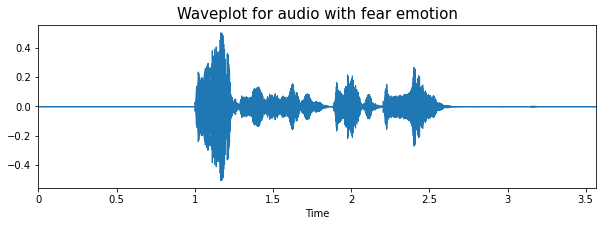

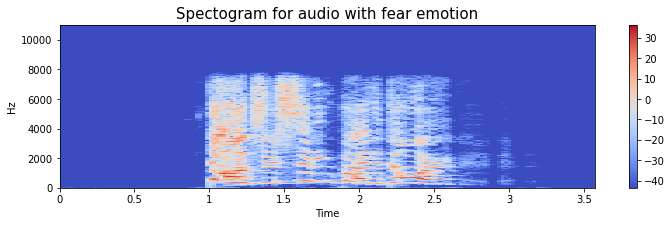

In [ ]:
emotion='fear'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

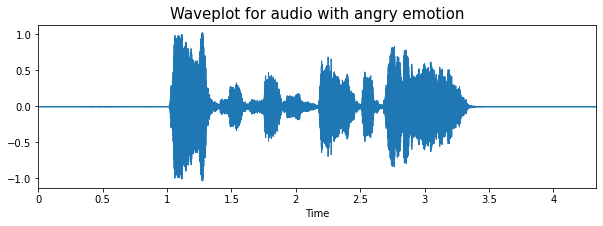

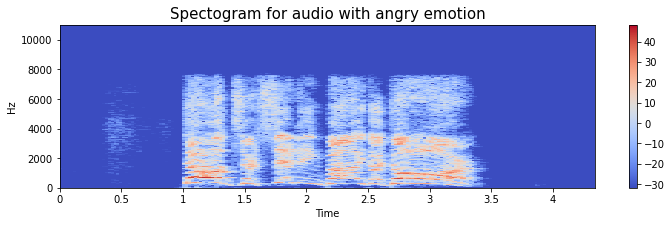

In [ ]:
emotion='angry'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

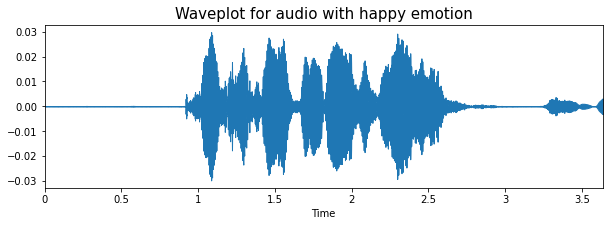

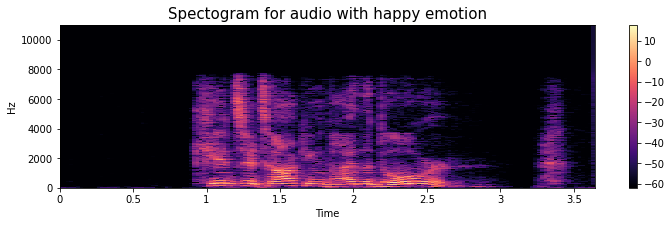

In [ ]:
emotion='happy'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

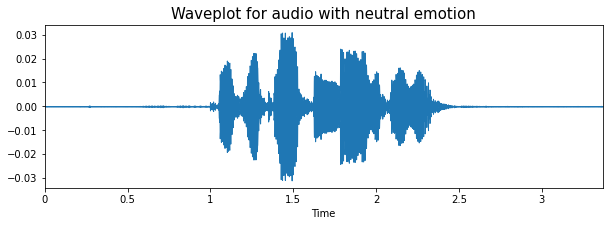

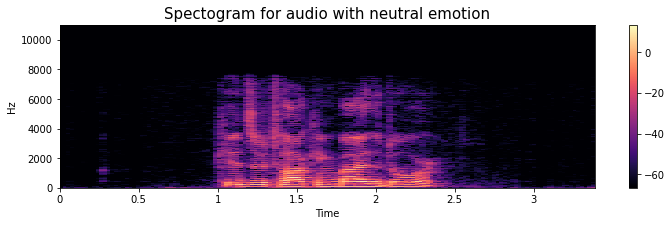

In [ ]:
emotion='neutral'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

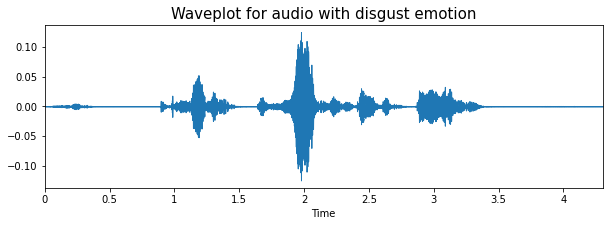

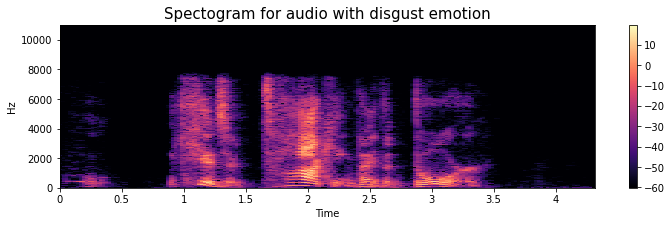

In [ ]:
emotion='disgust'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

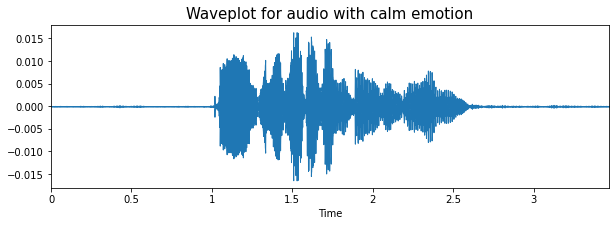

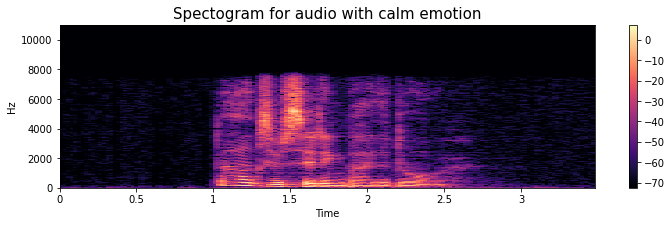

In [ ]:
emotion='calm'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

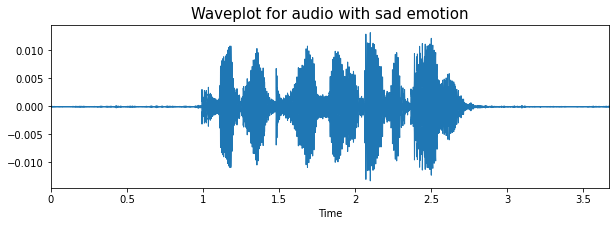

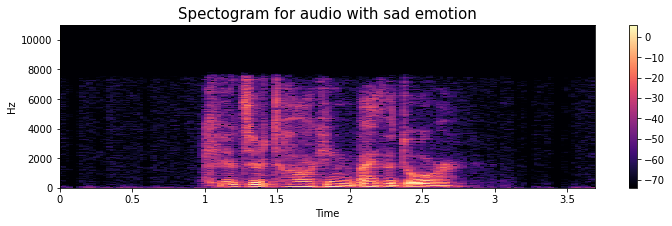

In [ ]:
emotion='sad'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data,samplingRate, emotion)
Audio(path)

In [ ]:
def noise(data):
  noiseAmp = 0.035*nup.random.uniform()*nup.amax(data)
  data = data + noiseAmp*nup.random.normal(size=data.shape[0])
  return data

def stretch(data, rate=0.8):
  return librosa.effects.time_stretch(data, rate)

def shift(data):
  shiftRange = int(nup.random.uniform(low=-5,high =5)*1000)
  return nup.roll(data,shiftRange)

def pitch(data, samplingRate, pitchFactor=0.7):
  return librosa.effects.pitch_shift(data, samplingRate, pitchFactor)
  



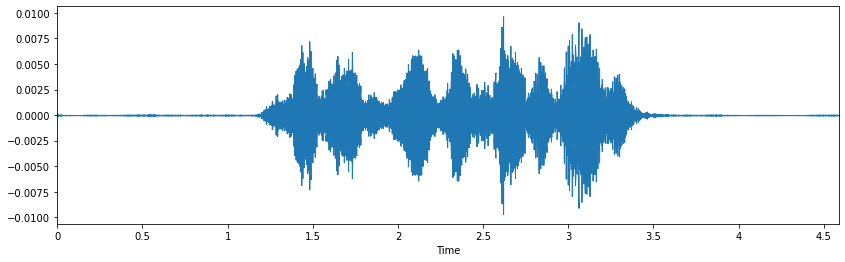

In [ ]:
x = stretch(data)
mplt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=samplingRate)
Audio(x, rate=samplingRate)

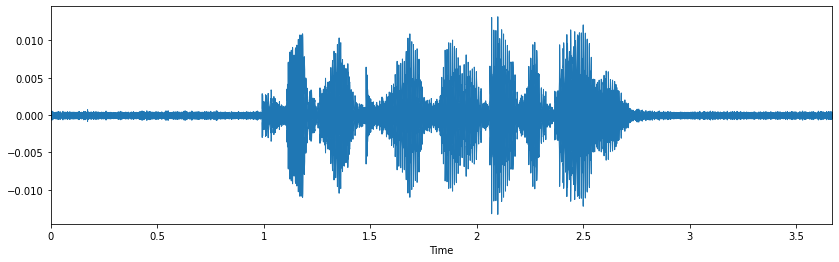

In [ ]:
x = noise(data)
mplt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=samplingRate)
Audio(x, rate=samplingRate)

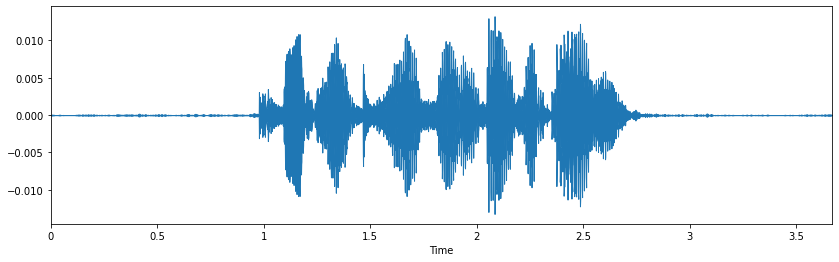

In [ ]:
x = shift(data)
mplt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=samplingRate)
Audio(x, rate=samplingRate)

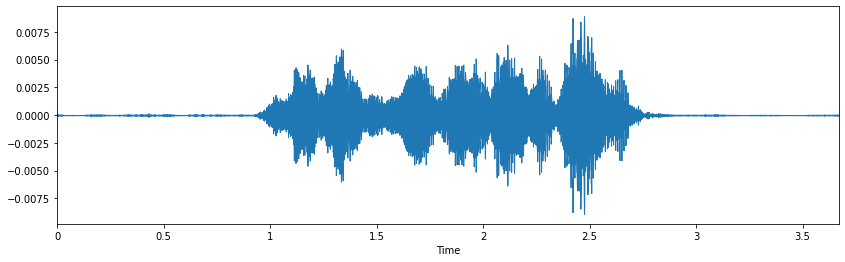

In [ ]:
x = pitch(data, samplingRate)
mplt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=samplingRate)
Audio(x, rate=samplingRate)

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=nup.abs(librosa.stft(X))
        result=nup.array([])
        if mfcc:
            mfccs=nup.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=nup.hstack((result, mfccs))
        if chroma:
            chroma=nup.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=nup.hstack((result, chroma))
        if mel:
            mel=nup.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=nup.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Data/audio_speech_actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(nup.array(x), y, test_size=test_size, random_state=9)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.21)

In [ ]:
x_train


array([[-5.96733826e+02,  4.49133110e+01, -3.91210327e+01, ...,
         2.68638792e-06,  2.31765512e-06,  2.53625944e-06],
       [-7.18712280e+02,  5.62868462e+01,  2.54147377e+01, ...,
         2.97656934e-05,  1.50084998e-05,  5.19591413e-06],
       [-7.28479492e+02,  5.72284584e+01,  2.94605541e+01, ...,
         6.60461819e-06,  3.53285895e-06,  1.83537327e-06],
       ...,
       [-4.43495087e+02,  2.03336716e+01, -1.97145195e+01, ...,
         1.33756967e-03,  9.82344733e-04,  5.66440634e-04],
       [-4.73113586e+02,  4.50266342e+01, -2.38711224e+01, ...,
         1.48668594e-03,  1.10300572e-03,  5.66599483e-04],
       [-5.54080200e+02,  4.68702927e+01, -6.66258514e-01, ...,
         6.37524936e-05,  2.96597937e-05,  1.21429366e-05]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(606, 162)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['calm', 'happy', 'fearful', 'happy', 'disgust', 'calm', 'happy',
       'calm', 'fearful', 'happy', 'happy', 'disgust', 'calm', 'happy',
       'disgust', 'fearful', 'happy', 'happy', 'disgust', 'happy', 'calm',
       'happy', 'disgust', 'calm', 'happy', 'calm', 'fearful', 'fearful',
       'calm', 'calm', 'disgust', 'disgust', 'fearful', 'disgust',
       'fearful', 'happy', 'happy', 'fearful', 'disgust', 'calm',
       'disgust', 'fearful', 'calm', 'calm', 'happy', 'calm', 'fearful',
       'happy', 'calm', 'disgust', 'fearful', 'happy', 'disgust',
       'disgust', 'disgust', 'fearful', 'calm', 'disgust', 'calm',
       'disgust', 'fearful', 'calm', 'fearful', 'calm', 'fearful', 'calm',
       'calm', 'happy', 'disgust', 'disgust', 'fearful', 'disgust',
       'disgust', 'fearful', 'happy', 'disgust', 'fearful', 'happy',
       'calm', 'fearful', 'fearful', 'calm', 'fearful', 'calm', 'disgust',
       'fearful', 'happy', 'disgust', 'fearful', 'fearful', 'disgust',
       'fe

In [ ]:
expected_of_y = y_test
yPred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

        calm       0.92      0.71      0.80        51
     disgust       0.67      0.70      0.69        44
     fearful       0.69      0.79      0.74        34
       happy       0.63      0.73      0.68        33

    accuracy                           0.73       162
   macro avg       0.73      0.73      0.73       162
weighted avg       0.75      0.73      0.73       162



In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.84%
